In [0]:
import pymc3 as pm

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [0]:
from sklearn import preprocessing

In [0]:
data = pd.read_csv('insurance.csv')

In [0]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.sex)
data.sex = label.transform(data.sex)
label.fit(data.smoker)
data.smoker = label.transform(data.smoker)
label.fit(data.region)
data.region = label.transform(data.region)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
x = data.drop(['charges', 'region'], axis = 1)
y = data.charges

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [0]:
from sklearn import preprocessing# Get column names first
names = data.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)


In [10]:
len(data)

1338

In [11]:
scaled_df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


In [0]:
data_train = scaled_df.drop(['region'], axis = 1)

In [13]:
data_train.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.776802


In [0]:
x_data = data_train.drop(['charges'], axis = 1)
y_data = data_train.charges

In [31]:
x_data.head()
#y_data.head()

,age,sex,bmi,children,smoker
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463
2,-0.797954,0.989591,0.383307,1.580926,-0.507463
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463


In [0]:
formula = 'charges ~ age + sex + bmi + children + smoker'

In [15]:
with pm.Model() as normal_model:
    
    
    family = pm.glm.families.Normal()
    
    
    pm.GLM.from_formula(formula, data = data_train)
    
    normal_trace = pm.sample(draws=300, tune = 500)

    #normal_trace = pm.sample(100)

Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [sd, smoker, children, bmi, sex, age, Intercept]
100%|██████████| 800/800 [00:01<00:00, 404.87it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b8683710>,
      dtype=object)

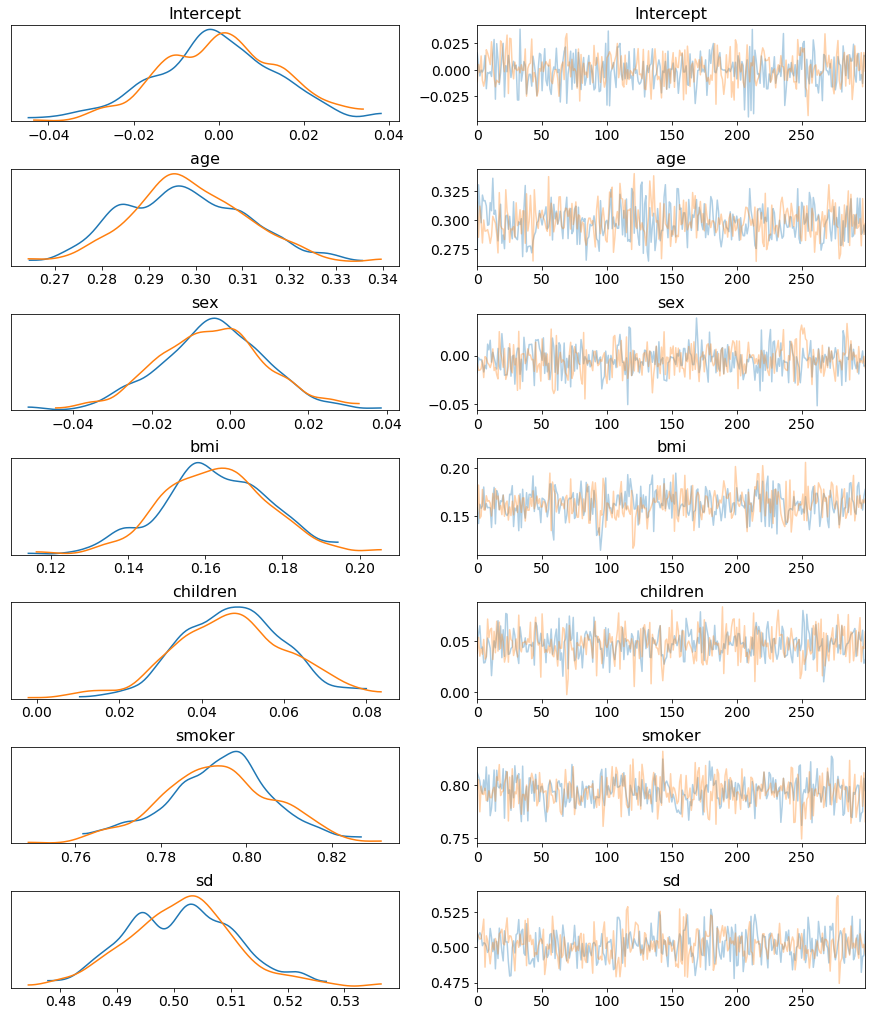

In [17]:
pm.traceplot(normal_trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c3cac5f8>,
      dtype=object)

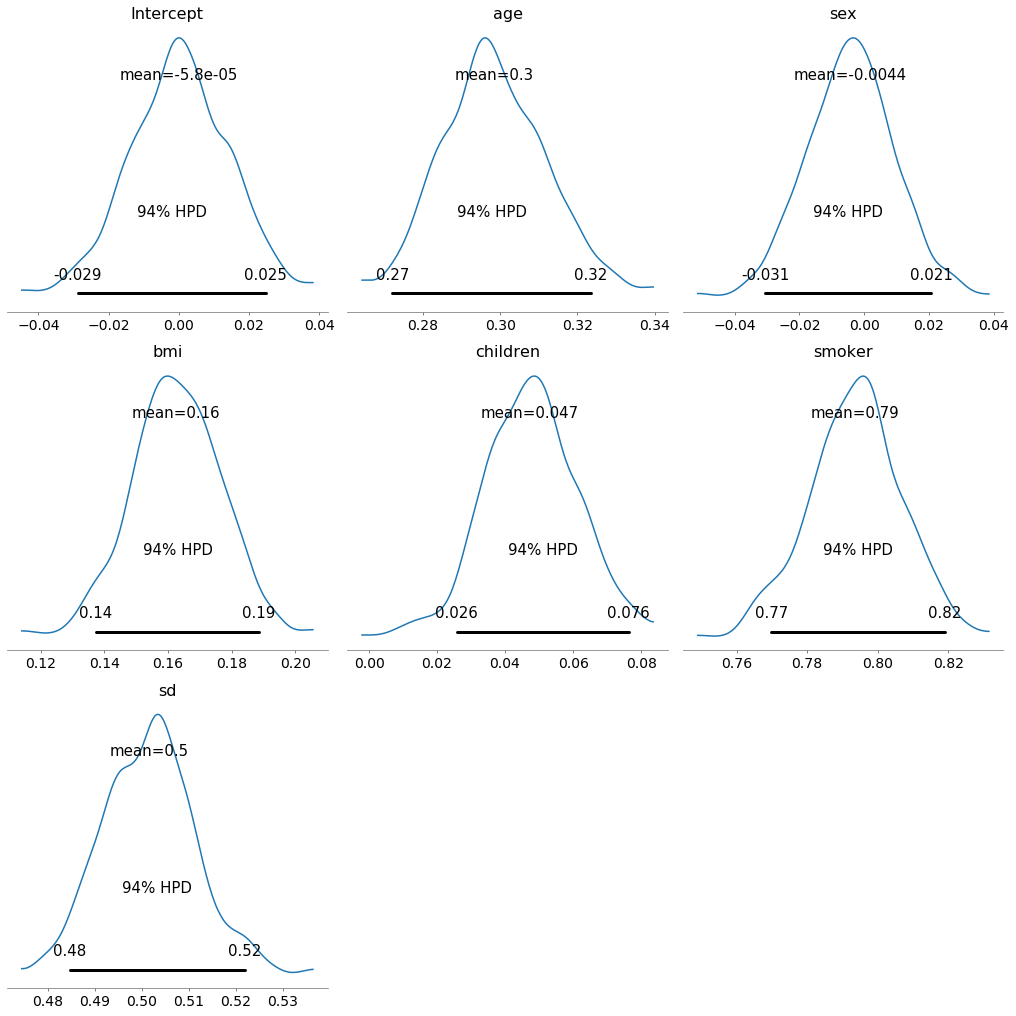

In [23]:
%matplotlib inline

pm.plot_posterior(normal_trace,figsize = (14, 14))

In [19]:
pm.summary(normal_trace)

/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-0.000058,0.014266,0.000519,-0.026095,0.029652,764.876576,1.002642
age,0.298471,0.013617,0.000614,0.270705,0.323740,421.604504,0.999988
sex,-0.004426,0.013612,0.000491,-0.029306,0.025100,765.830153,0.998452
bmi,0.162496,0.013932,0.000595,0.133123,0.186363,587.832664,0.998836
children,0.047388,0.013513,0.000498,0.025493,0.078739,721.327744,0.998730
smoker,0.793461,0.012873,0.000510,0.767591,0.818565,641.456357,0.998867
sd,0.501449,0.009762,0.000429,0.483644,0.521903,519.570374,0.998373


(<Figure size 432x820.8 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b4386b00>],
       dtype=object))

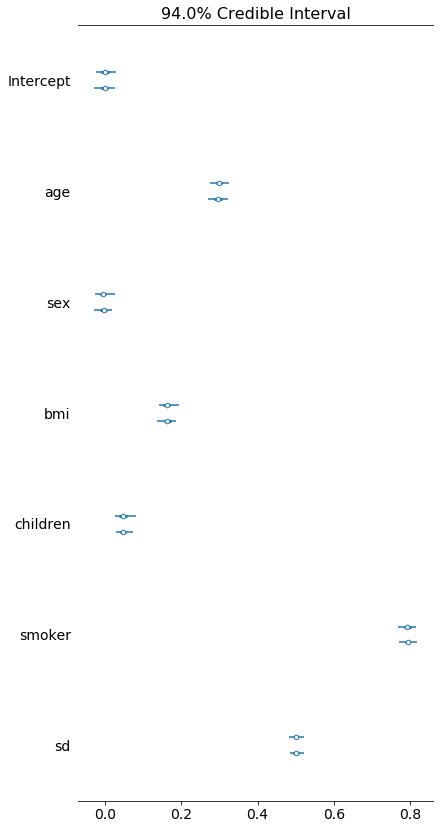

In [21]:
pm.forestplot(normal_trace)

In [24]:
model_formula = 'Charges = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Charges =  -0.00 * Intercept + 0.30 * age + -0.00 * sex + 0.16 * bmi + 0.05 * children + 0.79 * smoker + -0.69 * sd_log__ + 0.50 * sd'

In [0]:
def evaluate_trace(trace, X_train, X_test, y_train, y_test):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.ix[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.ix[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print(mae, rmse)
    
    return mae, rmse

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 0)

In [34]:
mae, rmse = evaluate_trace(normal_trace, x_train, x_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval =

0.4405420326062652 0.5668082135685514


In [37]:
print(mae, rmse)

0.4405420326062652 0.5668082135685514
